In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [77]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])


Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


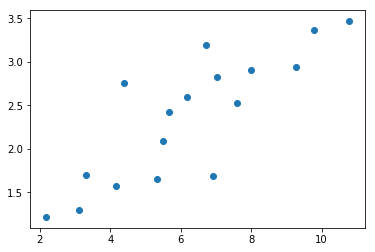

In [78]:
plt.scatter(X, Y)

### The best line is one where the distance of predicted point to the actual points is the least for all of the points together. 

### Yprediction = weight x Running Distance (feature) + 0.3 
### e.g. (Yprediction = 0.7 x Running Distance + 0.3)
### 0.3 = offset value that all numbers are offset by. With the water example, this might represent the amount of water that everyone drinks whether they run or not. 
### 0.7 = this is a weight, this represents the contribution of this feature to the overal prediction 

### We calculate the slope element by element where Running Distance in the above example represents a given element. 

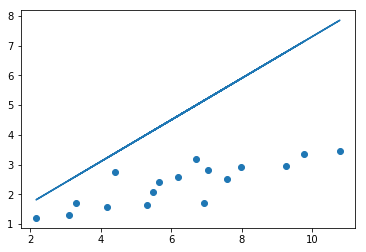

In [79]:
# multiply each number in X list by 0.7 and add 0.3 to get our attempt at a line
predicted_y_values = list(map(lambda x: 0.7 * x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values)

# We get a pretty terrible line. We need to try again 

In [80]:
# This finds the best line for us
print(np.polyfit(X, Y, 1))

[0.25163494 0.79880123]


### Above are the values that we can use to get a better line 

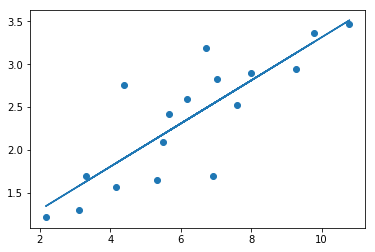

In [81]:
predicted_y_values = list(map(lambda x: 0.25163494 * x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values)
plt.show()

In [82]:
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

0.15385767404191164


In [83]:
# sklearn is better for some reason; not sure why
lr_reg = LinearRegression() # instantiate LinearRegression class
lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1)) # obtains the best weight and intercept
print(lr_reg.coef_)
print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


In [84]:
import pandas as pd

In [85]:
data = pd.read_csv('Advertising.csv')

In [88]:
features = ['TV', 'radio', 'newspaper']
X = data[features][:150]
Y = data.sales[:150]

X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [90]:
lr_reg.fit(X, Y)
print(lr_reg.intercept_)
print(lr_reg.coef_)

# pass TV, radio and newspaper values for the last 50 values
print(lr_reg.predict(data[features][:-50]))
# we end up with the predictions for the last 50 values in the dataframe

3.0297667962936803
[ 0.04700012  0.17993257 -0.00140273]
[20.54887629 12.12935888 11.99986446 17.49944016 13.3887405  12.13216558
 11.60109776 12.18958782  3.81042349 12.85847736  7.14613745 17.43346317
 10.37156277  8.96966628 18.477747   20.72216916 12.6419954  23.30265766
  9.94512274 14.22648061 18.20381911 15.07228699  6.44152069 16.76400286
  8.1993546  15.98850884 15.00043373 17.28724677 19.56744655  9.16966484
 21.82759541 11.4127615   7.82599525 19.11122907  7.76920358 17.41850177
 23.44813157 15.36523981  9.81043565 20.48436445 16.51546091 17.30425
 21.8106091  14.22849291  8.77299852 15.26378443  8.97693237 21.74634654
 16.48113213  8.22766528 12.92964702  9.47088161 20.64823258 19.84253292
 20.53645271 21.18259554  8.37089976 12.86260303 21.80916442 18.22765735
  5.87411983 22.91728924 17.02755557 13.17090019 16.85205749  7.94488548
  8.93352579 12.17159781 19.12031074 21.08027818 17.83914144 10.71894901
 10.20007209 10.09329233 17.46755769 11.56171783  4.58112561 13.801440

### Mean square error: 1/N * sum(Ytrue = Yprediction)^2
### R ^2 square 0 <= N <= 1 (numbers that are closer to 1 are better)

In [ ]:
sales_reg.fit(X_train, Y_train) # calculates the slope and intercept for the best line 
sales_reg.coef_ # shows slope 
sales_reg.intercept_ # shows intercept